# The better accuracy model is submitted in the other ipython notebook, please refer to that also.

The 4 ML algorithms I used for classification are KNN, SVM, Decision Trees and Random Forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV, LeaveOneGroupOut, cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
xtrain=pd.read_table('C:\\Users\\aiswa\\Desktop\\mlassignment\\UCI HAR Dataset\\UCI HAR Dataset\\train\\X_train.txt',delim_whitespace=True,header=None)

xtest=pd.read_table('C:\\Users\\aiswa\\Desktop\\mlassignment\\UCI HAR Dataset\\UCI HAR Dataset\\test\\X_test.txt',delim_whitespace=True,header=None)
ytrain=pd.read_table('C:\\Users\\aiswa\\Desktop\\mlassignment\\UCI HAR Dataset\\UCI HAR Dataset\\train\\y_train.txt',header=None)

ytest=pd.read_table('C:\\Users\\aiswa\\Desktop\\mlassignment\\UCI HAR Dataset\\UCI HAR Dataset\\test\\y_test.txt',header=None)

In [3]:
activity_labels=pd.read_csv('C:\\Users\\aiswa\\Desktop\\mlassignment\\UCI HAR Dataset\\UCI HAR Dataset\\activity_labels.txt', sep=' ', header=None, names=('ID','Activity'))

In [4]:
activity_labels.head(6)

,ID,Activity
0,1,WALKING
1,2,WALKING_UPSTAIRS
2,3,WALKING_DOWNSTAIRS
3,4,SITTING
4,5,STANDING
5,6,LAYING


In [5]:
print(ytrain.shape)
print(ytest.shape)

(7352, 1)
(2947, 1)


In [6]:
sensor_labels = pd.read_csv('C:\\Users\\aiswa\\Desktop\\mlassignment\\UCI HAR Dataset\\UCI HAR Dataset\\features.txt',sep=' ', header=None, names=('ID','Sensor'))
sensor_labels.head()

,ID,Sensor
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [9]:
xtrain.columns = sensor_labels['Sensor']
xtest.columns = sensor_labels['Sensor']

In [10]:
xtrain.head()

Sensor,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [11]:
print(xtrain.shape)
print(xtest.shape)

(7352, 561)
(2947, 561)


In [12]:
xtrain.describe()

Sensor,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.250994,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,0.134000,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,0.289096,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


# K Nearest Neighbours 

In [16]:
knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain.values.ravel())

train_pred = knn.predict(xtrain)
y_pred = knn.predict(xtest)

print('Accuracy score TRAIN: ', format(accuracy_score(ytrain, train_pred)))
print('Accuracy score TEST: ', format(accuracy_score(ytest, y_pred)))

Accuracy score TRAIN:  0.9843579978237215
Accuracy score TEST:  0.9015948422124194


Train Accuracy = 98.4% and 
Test Accuracy = 90.1%

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics

Standard Metrics for K Nearest Neighbours

In [72]:
print(classification_report(y_test, y_pred, target_names=['1','2','3','4','5','6']))

              precision    recall  f1-score   support

           1       0.22      0.23      0.23       496
           2       0.23      0.21      0.22       471
           3       0.27      0.24      0.25       420
           4       0.26      0.26      0.26       491
           5       0.27      0.29      0.28       531
           6       0.22      0.23      0.23       537

    accuracy                           0.24      2946
   macro avg       0.25      0.24      0.24      2946
weighted avg       0.24      0.24      0.24      2946



Confusion matrix for KNN

[[114 112  86  43  58  83]
 [134 101  91  41  39  65]
 [115  96  99  33  30  47]
 [ 26  26  30 129 156 124]
 [ 44  39  18 157 152 121]
 [ 80  59  48  96 129 125]]


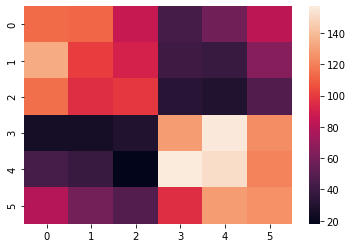

In [74]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
print(cm)
# print(classification_report(y_test,y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_mat.flatten()/np.sum(conf_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, fmt='')
plt.show()


# Decision Tree Classifier

In [22]:
import pandas as pd
from numpy import loadtxt

In [23]:
X_test = pd.read_csv("C:\\Users\\aiswa\\Desktop\\mlassignment\\UCI HAR Dataset\\UCI HAR Dataset\\test\\X_test.txt",sep="\t")

y_test = pd.read_csv("C:\\Users\\aiswa\\Desktop\\mlassignment\\UCI HAR Dataset\\UCI HAR Dataset\\test\\y_test.txt",sep = "\t")

In [24]:
X_train = pd.read_csv("C:\\Users\\aiswa\\Desktop\\mlassignment\\UCI HAR Dataset\\UCI HAR Dataset\\train\\X_train.txt",sep="\t")

y_train = pd.read_csv("C:\\Users\\aiswa\\Desktop\\mlassignment\\UCI HAR Dataset\\UCI HAR Dataset\\train\\y_train.txt",sep="\t")

In [25]:
X_train = pd.concat([X_train[col].str.split()
                       .str[0]
                       .str.replace(',','').astype(float) for col in X_train], axis=1)

In [26]:
X_test = pd.concat([X_test[col].str.split()
                       .str[0]
                       .str.replace(',','').astype(float) for col in X_test], axis=1)

In [27]:
y_test

,5
0,5
1,5
2,5
3,5
4,5
...,...
2941,2
2942,2
2943,2
2944,2


In [28]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train, y_train)

In [29]:
y_pred = classifier.predict(X_test)

In [30]:
from sklearn import metrics 
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred) * 100)

Accuracy Score: 24.43991853360489


[[114 112  86  43  58  83]
 [134 101  91  41  39  65]
 [115  96  99  33  30  47]
 [ 26  26  30 129 156 124]
 [ 44  39  18 157 152 121]
 [ 80  59  48  96 129 125]]
              precision    recall  f1-score   support

           1       0.22      0.23      0.23       496
           2       0.23      0.21      0.22       471
           3       0.27      0.24      0.25       420
           4       0.26      0.26      0.26       491
           5       0.27      0.29      0.28       531
           6       0.22      0.23      0.23       537

    accuracy                           0.24      2946
   macro avg       0.25      0.24      0.24      2946
weighted avg       0.24      0.24      0.24      2946



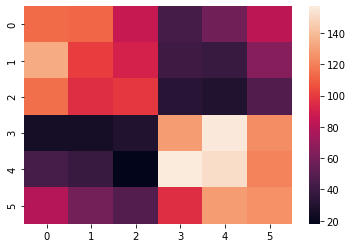

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_mat.flatten()/np.sum(conf_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, fmt='')
plt.show()

# Support Vector Machines

In [35]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(xtrain, ytrain)

SVC(kernel='linear')

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[114 112  86  43  58  83]
 [134 101  91  41  39  65]
 [115  96  99  33  30  47]
 [ 26  26  30 129 156 124]
 [ 44  39  18 157 152 121]
 [ 80  59  48  96 129 125]]
              precision    recall  f1-score   support

           1       0.22      0.23      0.23       496
           2       0.23      0.21      0.22       471
           3       0.27      0.24      0.25       420
           4       0.26      0.26      0.26       491
           5       0.27      0.29      0.28       531
           6       0.22      0.23      0.23       537

    accuracy                           0.24      2946
   macro avg       0.25      0.24      0.24      2946
weighted avg       0.24      0.24      0.24      2946



[[114 112  86  43  58  83]
 [134 101  91  41  39  65]
 [115  96  99  33  30  47]
 [ 26  26  30 129 156 124]
 [ 44  39  18 157 152 121]
 [ 80  59  48  96 129 125]]


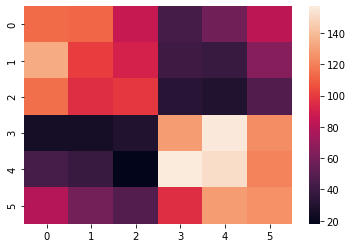

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
print(cm)
# print(classification_report(y_test,y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_mat.flatten()/np.sum(conf_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, fmt='')
plt.show()

# Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=123456)

In [41]:
from sklearn.metrics import accuracy_score
predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print(accuracy)

0.2447386286490156


In [42]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[114 112  86  43  58  83]
 [134 101  91  41  39  65]
 [115  96  99  33  30  47]
 [ 26  26  30 129 156 124]
 [ 44  39  18 157 152 121]
 [ 80  59  48  96 129 125]]
              precision    recall  f1-score   support

           1       0.22      0.23      0.23       496
           2       0.23      0.21      0.22       471
           3       0.27      0.24      0.25       420
           4       0.26      0.26      0.26       491
           5       0.27      0.29      0.28       531
           6       0.22      0.23      0.23       537

    accuracy                           0.24      2946
   macro avg       0.25      0.24      0.24      2946
weighted avg       0.24      0.24      0.24      2946



[[114 112  86  43  58  83]
 [134 101  91  41  39  65]
 [115  96  99  33  30  47]
 [ 26  26  30 129 156 124]
 [ 44  39  18 157 152 121]
 [ 80  59  48  96 129 125]]


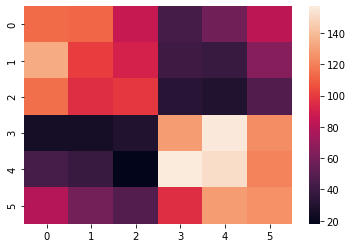

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
print(cm)
# print(classification_report(y_test,y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_mat.flatten()/np.sum(conf_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, fmt='')
plt.show()

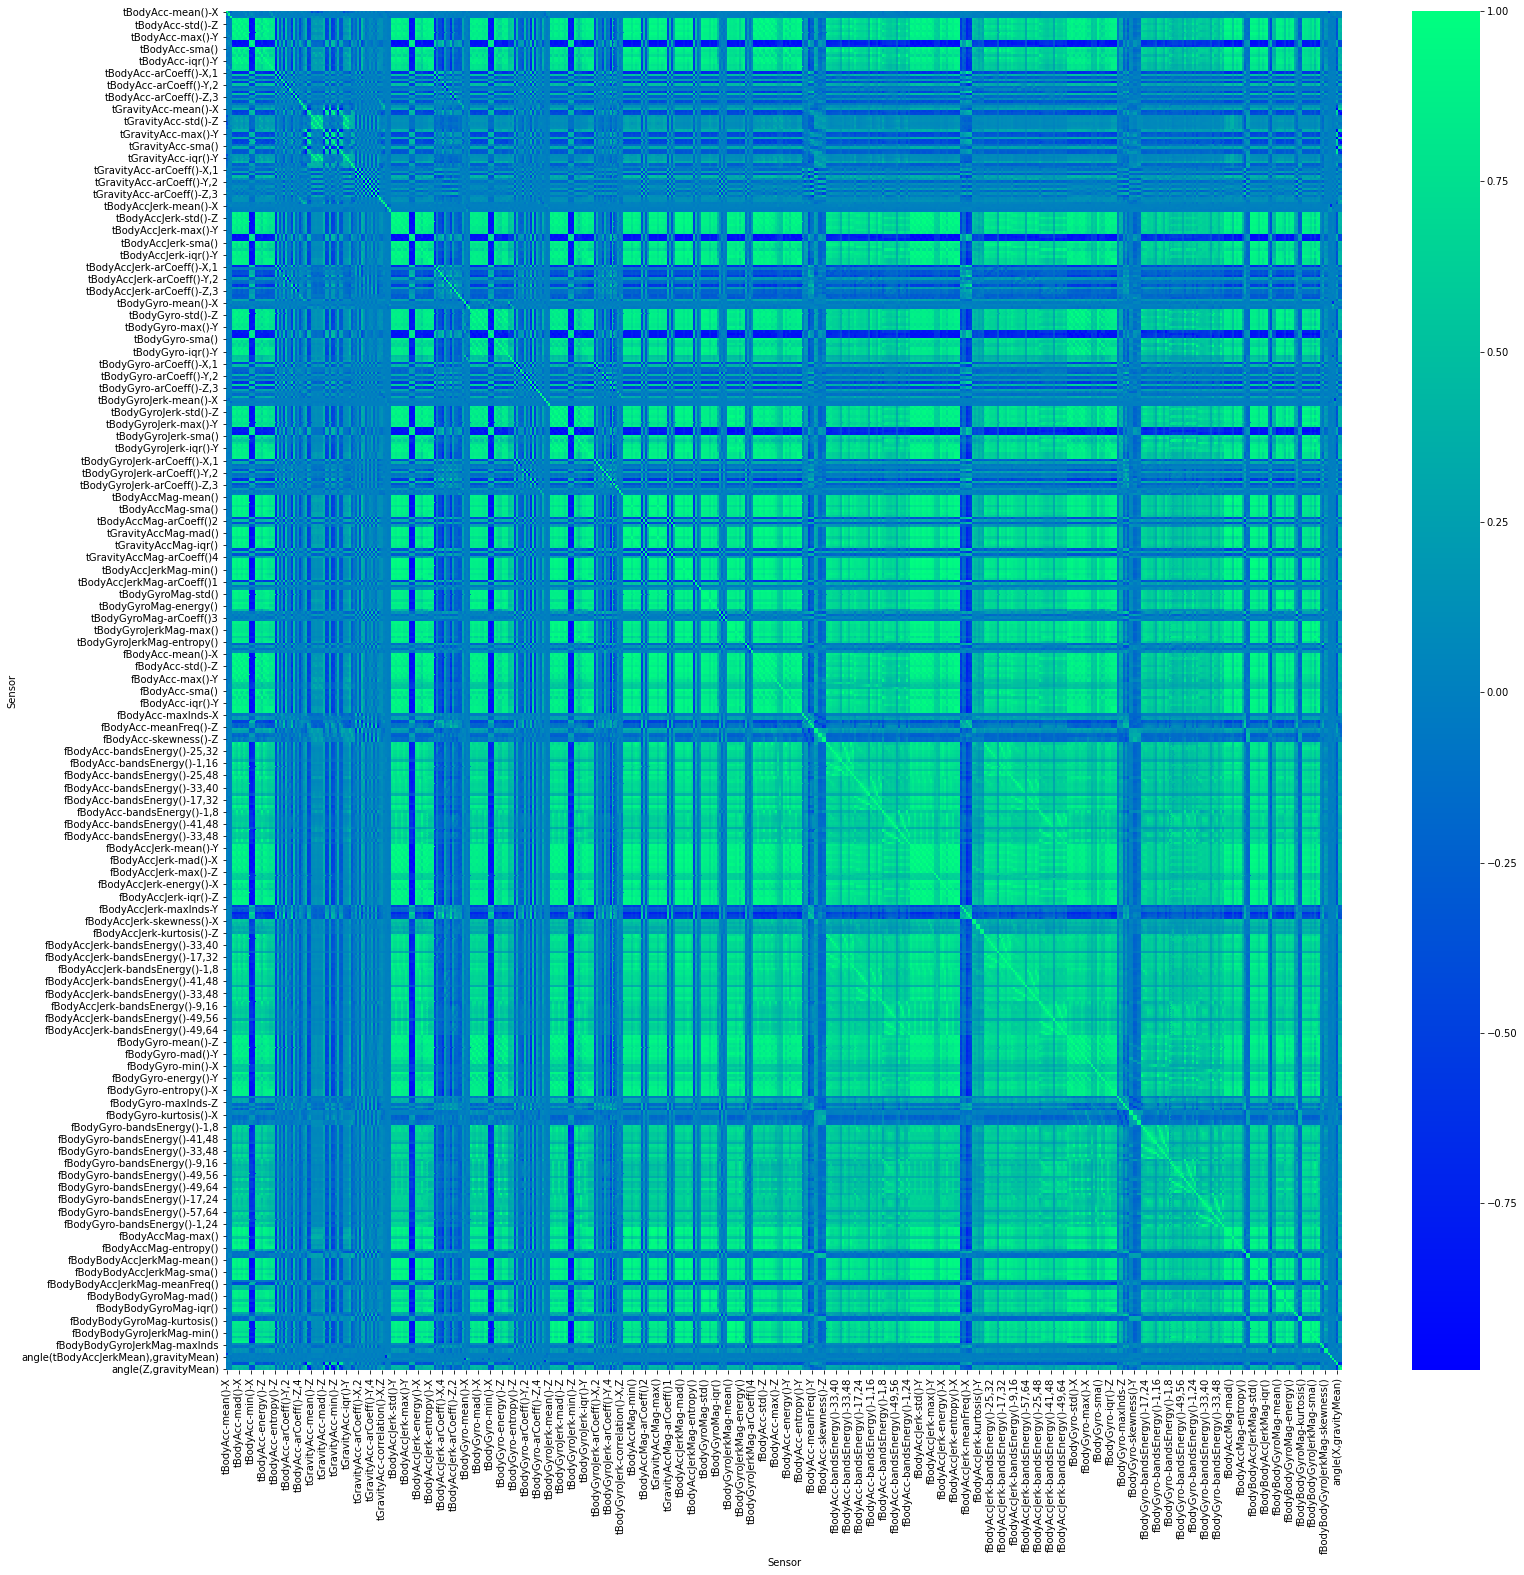

In [44]:
correlations = xtrain.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(correlations, cmap='winter')
plt.show()

# Inference

In [75]:
accuracy=pd.read_excel("C:\\Users\\aiswa\\Documents\\accuracy.xlsx")
accuracy.head()


,Model,accuracy train,Accuracy test
0,SVM,99.5,96.7
1,Decision tree,85.0,90.0
2,Random forest,99.8,92.6
3,KNN,98.0,90.2


K-nearest neighbours performed reasonably well accuracy on the test data. A significant performance drop can be seen moving from training data to the test data, 3d plot justifies this.
The random forest gave a small improvement in accuracy on the test data. It has learned the train data very well, but suffers a similar performance drop when looking at the test data.
The SVM with linear kernel performed the best test accuracy, confusion matrix explains this.
SVM classifies most of the activities with very high accuracy except for sitting. Here, it has a slight misclassification rate.
4 algorithms tested had broadly comparable accuracy score. They were all able to learn the training data quite well, but the SVM with a linear kernel was the best performing with an accuracy on test data